In [68]:
import numpy as np
from sklearn.cluster import KMeans, DBSCAN, MeanShift
import matplotlib.pyplot as plt
import plotly.express as px

In [69]:
import matplotlib.font_manager as fm

# 한글 폰트 설정 (예: 맑은 고딕)
plt.rcParams['font.family'] = 'Malgun Gothic'  # Windows의 경우
plt.rcParams['axes.unicode_minus'] = False  # 마이너스 기호가 깨지는 것을 방지

# 폰트 확인
print([f.name for f in fm.fontManager.ttflist if 'Malgun' in f.name])

['Malgun Gothic', 'Malgun Gothic', 'Malgun Gothic']


In [70]:
# 예제 데이터: 하의 n개의 RGB 값 (r, g, b) 리스트
bottom_colors = [
    [255, 0, 0],  # 빨강
    [0, 255, 0],  # 초록
    [0, 0, 255],  # 파랑
    [255, 255, 0],  # 노랑
    [128, 0, 128],  # 보라
    # ... 다른 하의의 RGB 값 추가
]

In [71]:
# 데이터 배열로 변환
bottom_colors_array = np.array(bottom_colors)

In [72]:
# KMeans 클러스터링 설정 (클러스터 수 k는 원하는 값으로 설정)
k = 3  
kmeans = KMeans(n_clusters=k)
kmeans.fit(bottom_colors_array)

# 클러스터링 결과
labels_km = kmeans.labels_  # 각 RGB 값에 대한 클러스터 레이블
centroids_km = kmeans.cluster_centers_  # 각 클러스터의 중심점 (대표 색상)

# 결과 출력
print("클러스터 레이블:", labels_km)
print("클러스터 중심 (대표 색상):\n")
print(centroids_km)

클러스터 레이블: [1 0 1 2 1]
클러스터 중심 (대표 색상):

[[  0.         255.           0.        ]
 [127.66666667   0.         127.66666667]
 [255.         255.           0.        ]]


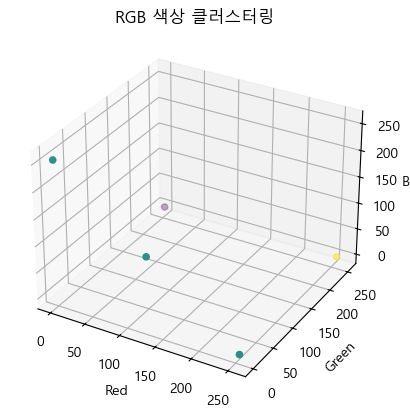

In [73]:
# plt 시각화
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(bottom_colors_array[:, 0], bottom_colors_array[:, 1], bottom_colors_array[:, 2], c=labels_km, cmap='viridis')
ax.set_xlabel('Red')
ax.set_ylabel('Green')
ax.set_zlabel('Blue')
plt.title('RGB 색상 클러스터링')
plt.show()

In [74]:
# Plotly를 이용한 3D 시각화
fig = px.scatter_3d(
    x=bottom_colors_array[:, 0],  # Red
    y=bottom_colors_array[:, 1],  # Green
    z=bottom_colors_array[:, 2],  # Blue
    color=labels_km.astype(str),  # 클러스터 레이블을 색상으로 사용 (문자열로 변환)
    labels={'x': 'Red', 'y': 'Green', 'z': 'Blue'},
    title='RGB 색상 클러스터링 (Plotly)'
)
fig.show()

In [75]:
# DBSCAN 설정 (eps와 min_samples는 데이터에 맞게 조정 필요)
dbscan = DBSCAN(eps=50, min_samples=1)  # eps: 거리 임계값, min_samples: 최소 샘플 수
labels_db = dbscan.fit_predict(bottom_colors_array)

# 클러스터별 중심점 계산
unique_labels_db = set(labels_db) - {-1}  # 노이즈 레이블 -1 제외
cluster_centers_db = []

for label in unique_labels_db:
    cluster_points_db = bottom_colors_array[labels_db == label]  # 해당 클러스터에 속한 포인트
    center_db = cluster_points_db.mean(axis=0)  # 클러스터 중심점 계산 (RGB 평균)
    cluster_centers_db.append(center_db)

cluster_centers_db = np.array(cluster_centers_db)
print("클러스터 중심점 (대표 색상):")
print(cluster_centers_db)

클러스터 중심점 (대표 색상):
[[255.   0.   0.]
 [  0. 255.   0.]
 [  0.   0. 255.]
 [255. 255.   0.]
 [128.   0. 128.]]


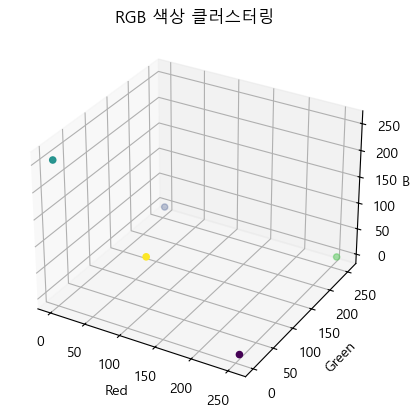

In [76]:
# plt 시각화
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(bottom_colors_array[:, 0], bottom_colors_array[:, 1], bottom_colors_array[:, 2], c=labels_db, cmap='viridis')
ax.set_xlabel('Red')
ax.set_ylabel('Green')
ax.set_zlabel('Blue')
plt.title('RGB 색상 클러스터링')
plt.show()


In [77]:
# Plotly를 이용한 3D 시각화
import plotly.express as px

fig = px.scatter_3d(
    x=bottom_colors_array[:, 0],  # Red
    y=bottom_colors_array[:, 1],  # Green
    z=bottom_colors_array[:, 2],  # Blue
    color=labels_db.astype(str),  # 클러스터 레이블을 색상으로 사용 (문자열로 변환)
    labels={'x': 'Red', 'y': 'Green', 'z': 'Blue'},
    title='RGB 색상 클러스터링 (Plotly)'
)
fig.show()

In [80]:
# MeanShift
# from sklearn.cluster import estimate_bandwidth

# bandwidth = estimate_bandwidth(bottom_colors, quantile=0.2)  # 예: 0.2는 대역폭의 양을 결정
mean_shift = MeanShift()
labels_ms = mean_shift.fit_predict(bottom_colors)
cluster_centers_ms = mean_shift.cluster_centers_

# 결과 출력
print("클러스터 레이블:", labels_ms)
print("클러스터 중심 (대표 색상):\n")
print(cluster_centers_ms)

클러스터 레이블: [1 3 4 0 2]
클러스터 중심 (대표 색상):

[[255. 255.   0.]
 [255.   0.   0.]
 [128.   0. 128.]
 [  0. 255.   0.]
 [  0.   0. 255.]]


In [83]:
cluster_centers_ms

array([[255., 255.,   0.],
       [255.,   0.,   0.],
       [128.,   0., 128.],
       [  0., 255.,   0.],
       [  0.,   0., 255.]])

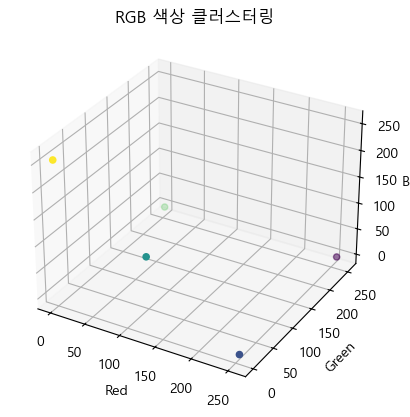

In [81]:
# plt 시각화
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(bottom_colors_array[:, 0], bottom_colors_array[:, 1], bottom_colors_array[:, 2], c=labels_ms, cmap='viridis')
ax.set_xlabel('Red')
ax.set_ylabel('Green')
ax.set_zlabel('Blue')
plt.title('RGB 색상 클러스터링')
plt.show()


In [82]:
# Plotly를 이용한 3D 시각화
import plotly.express as px

fig = px.scatter_3d(
    x=bottom_colors_array[:, 0],  # Red
    y=bottom_colors_array[:, 1],  # Green
    z=bottom_colors_array[:, 2],  # Blue
    color=labels_ms.astype(str),  # 클러스터 레이블을 색상으로 사용 (문자열로 변환)
    labels={'x': 'Red', 'y': 'Green', 'z': 'Blue'},
    title='RGB 색상 클러스터링 (Plotly)'
)
fig.show()